<a href="https://colab.research.google.com/github/netragangurde/-Prepinsta/blob/main/Superstore_Sales__EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and Loading the dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
sales = pd.read_csv('/content/train.csv')

In [4]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
sales.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
sales.shape

(9800, 18)

In this dataset we have 9800 rows and 18 columns

Sales is our target column.

Filling the missing values

In [8]:
sales.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Postal code has 11 missing values. Since there are only 11 missing values, we can drop the 11 rows it won't affect the dataset.

In [9]:
sales.dropna(axis=0, inplace=True)

In [10]:
sales.shape

(9789, 18)

We can drop RowID and Customer Name since we have Customer ID

In [11]:
sales.drop(columns=['Row ID','Customer Name'], axis=1, inplace=True)

Since Country Column have same value through out the dataset. So we can drop the column.

In [12]:
sales.Country.value_counts()

United States    9789
Name: Country, dtype: int64

In [13]:
sales.drop(columns=['Country'], axis=1, inplace=True)

In [14]:
sales.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [15]:
sales['Ship Mode'].value_counts()

Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

In [16]:
sales.Segment.value_counts()

Consumer       5096
Corporate      2948
Home Office    1745
Name: Segment, dtype: int64

In [17]:
sales.Region.value_counts()

West       3140
East       2774
Central    2277
South      1598
Name: Region, dtype: int64

In [18]:
sales.Category.value_counts()

Office Supplies    5903
Furniture          2076
Technology         1810
Name: Category, dtype: int64

In [19]:
sales['Region'] = sales['Region'].map({'Central': 0,'South':1,'East':2,'West':3})

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoder = LabelEncoder()

In [22]:
sales['Segment'] = label_encoder.fit_transform(sales['Segment'])
label_encoder.classes_

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [23]:
sales.Category = label_encoder.fit_transform(sales['Category'])
sales['Ship Mode'] = label_encoder.fit_transform(sales['Ship Mode'])

In [24]:
sales['Customer ID'].nunique()

793

In [25]:
sales['Order ID'].nunique()

4916

In [26]:
sales['Product ID'].nunique()

1860

For Order Date and Ship Date. I am going to make them on seperate columns like order date, order month, order year

In [27]:
sales['order_date'] = sales['Order Date'].str.split('/').str[0]

In [28]:
sales['order_month'] = sales['Order Date'].str.split('/').str[1]
sales['order_year'] = sales['Order Date'].str.split('/').str[2]

In [29]:
## Same with ship date column
sales['ship_date'] = sales['Ship Date'].str.split('/').str[0]
sales['ship_month'] = sales['Ship Date'].str.split('/').str[1]
sales['ship_year'] = sales['Ship Date'].str.split('/').str[2]

In [30]:
sales['order_date'] = sales['order_date'].astype(int)
sales['order_month'] = sales['order_month'].astype(int)
sales['order_year'] = sales['order_year'].astype(int)

In [31]:
sales['ship_date']= sales['ship_date'].astype(int)
sales['ship_month'] = sales['ship_month'].astype(int)
sales['ship_year'] = sales['ship_year'].astype(int)

In [32]:
sales.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,...,Category,Sub-Category,Product Name,Sales,order_date,order_month,order_year,ship_date,ship_month,ship_year
0,CA-2017-152156,08/11/2017,11/11/2017,2,CG-12520,0,Henderson,Kentucky,42420.0,1,...,0,Bookcases,Bush Somerset Collection Bookcase,261.9600,8,11,2017,11,11,2017
1,CA-2017-152156,08/11/2017,11/11/2017,2,CG-12520,0,Henderson,Kentucky,42420.0,1,...,0,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,8,11,2017,11,11,2017
2,CA-2017-138688,12/06/2017,16/06/2017,2,DV-13045,1,Los Angeles,California,90036.0,3,...,1,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,12,6,2017,16,6,2017
3,US-2016-108966,11/10/2016,18/10/2016,3,SO-20335,0,Fort Lauderdale,Florida,33311.0,1,...,0,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,11,10,2016,18,10,2016
4,US-2016-108966,11/10/2016,18/10/2016,3,SO-20335,0,Fort Lauderdale,Florida,33311.0,1,...,1,Storage,Eldon Fold 'N Roll Cart System,22.3680,11,10,2016,18,10,2016


Now we can drop Order Date and Ship Date

In [33]:
sales.drop(columns=['Order Date','Ship Date'], axis=1, inplace=True)

In [34]:
sales.head()

,Order ID,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,order_date,order_month,order_year,ship_date,ship_month,ship_year
0,CA-2017-152156,2,CG-12520,0,Henderson,Kentucky,42420.0,1,FUR-BO-10001798,0,Bookcases,Bush Somerset Collection Bookcase,261.9600,8,11,2017,11,11,2017
1,CA-2017-152156,2,CG-12520,0,Henderson,Kentucky,42420.0,1,FUR-CH-10000454,0,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,8,11,2017,11,11,2017
2,CA-2017-138688,2,DV-13045,1,Los Angeles,California,90036.0,3,OFF-LA-10000240,1,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,12,6,2017,16,6,2017
3,US-2016-108966,3,SO-20335,0,Fort Lauderdale,Florida,33311.0,1,FUR-TA-10000577,0,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,11,10,2016,18,10,2016
4,US-2016-108966,3,SO-20335,0,Fort Lauderdale,Florida,33311.0,1,OFF-ST-10000760,1,Storage,Eldon Fold 'N Roll Cart System,22.3680,11,10,2016,18,10,2016


In [35]:
sales.dtypes

Order ID         object
Ship Mode         int64
Customer ID      object
Segment           int64
City             object
State            object
Postal Code     float64
Region            int64
Product ID       object
Category          int64
Sub-Category     object
Product Name     object
Sales           float64
order_date        int64
order_month       int64
order_year        int64
ship_date         int64
ship_month        int64
ship_year         int64
dtype: object

In [36]:
sales.describe()

,Ship Mode,Segment,Postal Code,Region,Category,Sales,order_date,order_month,order_year,ship_date,ship_month,ship_year
count,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000
mean,2.235877,0.657677,55273.322403,1.692308,0.972827,230.116193,15.486771,7.822658,2016.723567,15.891817,7.756359,2016.738788
std,1.100134,0.762706,32041.223413,1.148871,0.629506,625.302079,8.755461,3.277864,1.124184,8.805848,3.334105,1.127048
min,0.000000,0.000000,1040.000000,0.000000,0.000000,0.444000,1.000000,1.000000,2015.000000,1.000000,1.000000,2015.000000
25%,2.000000,0.000000,23223.000000,1.000000,1.000000,17.248000,8.000000,5.000000,2016.000000,8.000000,5.000000,2016.000000
50%,3.000000,0.000000,58103.000000,2.000000,1.000000,54.384000,16.000000,9.000000,2017.000000,16.000000,9.000000,2017.000000
75%,3.000000,1.000000,90008.000000,3.000000,1.000000,210.392000,23.000000,11.000000,2018.000000,24.000000,11.000000,2018.000000
max,3.000000,2.000000,99301.000000,3.000000,2.000000,22638.480000,31.000000,12.000000,2018.000000,31.000000,12.000000,2019.000000


# DATA VISUALIZATION

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Univariate and bivariate Analysis

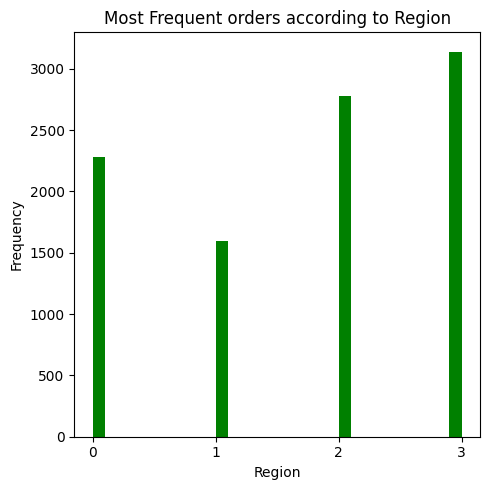

In [38]:
plt.figure(figsize=(5,5))
plt.hist(sales['Region'], bins=30, color='green')
plt.title('Most Frequent orders according to Region')
plt.xticks([0,1,2,3])
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.tight_layout()

In [39]:
box = sales[['Postal Code','Sales']]

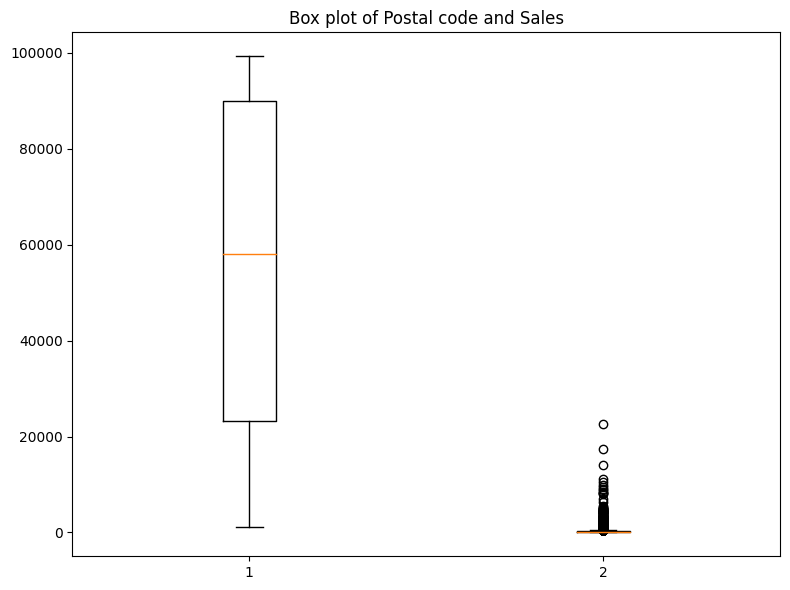

In [40]:
plt.figure(figsize=(8,6))
plt.boxplot(x=box)
plt.title('Box plot of Postal code and Sales')
plt.tight_layout()

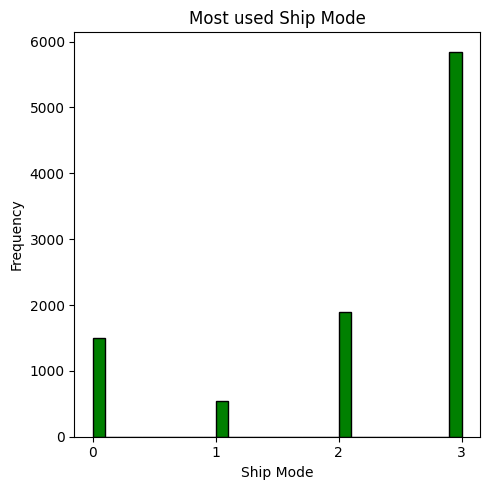

In [41]:
plt.figure(figsize=(5,5))
plt.hist(sales['Ship Mode'],bins=30, color='green', edgecolor='black')
plt.title('Most used Ship Mode')
plt.xticks([0,1,2,3])
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')
plt.tight_layout()

<Axes: xlabel='Segment', ylabel='count'>

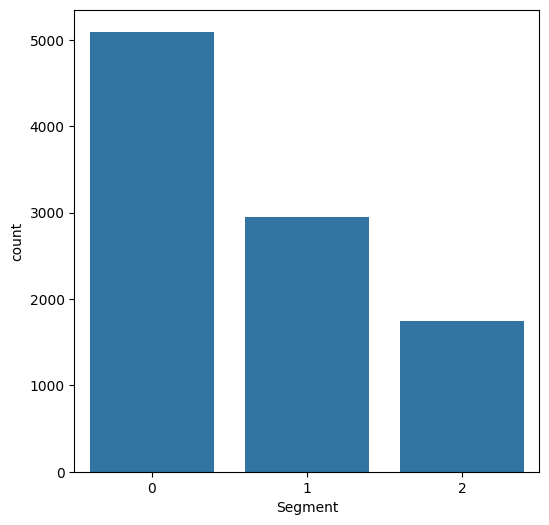

In [42]:
plt.figure(figsize=(6,6))
sns.countplot(data=sales,x='Segment')

In [44]:
corr = sales.corr()

<ipython-input-44-e73a5f1cc519>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales.corr()


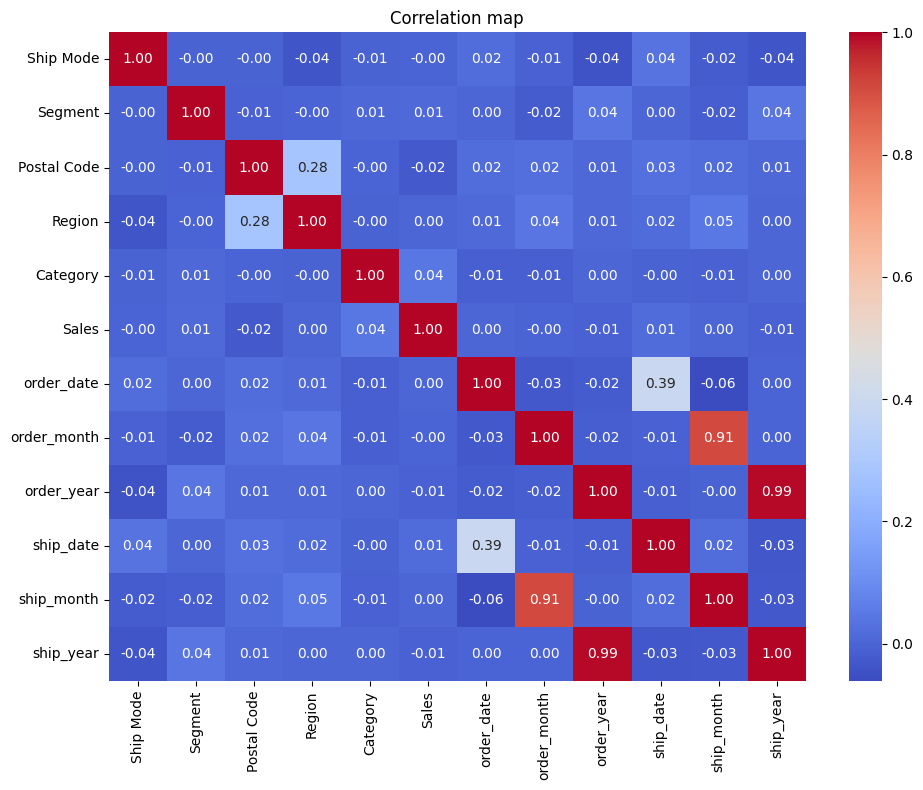

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation map')
plt.tight_layout()

In [46]:
monthly_sales = sales.groupby('order_month')['Sales'].sum()

In [47]:
yearly_sales = sales.groupby('order_year')['Sales'].sum()

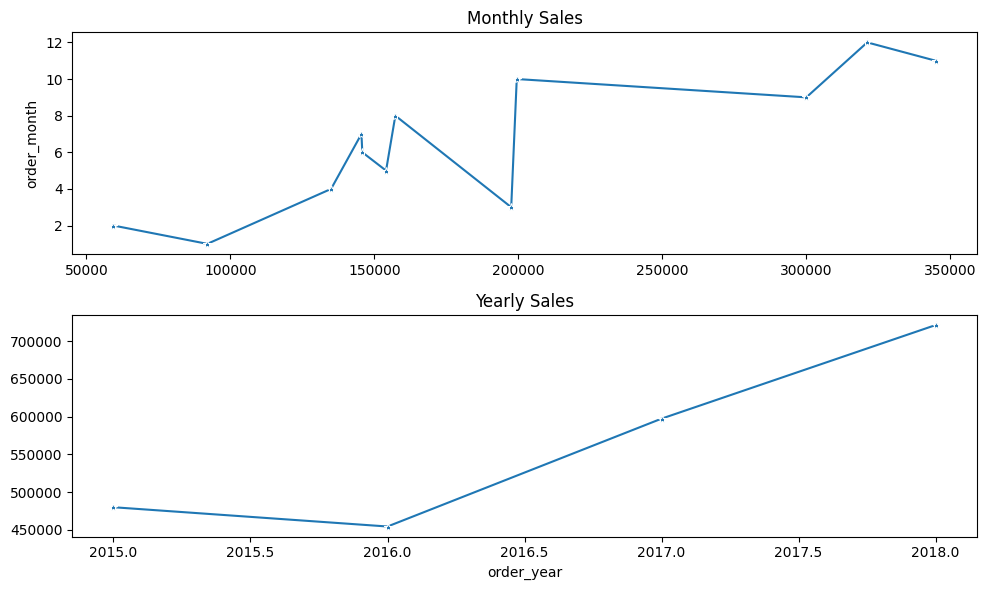

In [48]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
sns.lineplot(x=monthly_sales.values, y=monthly_sales.index, marker='*')
plt.title('Monthly Sales')

plt.subplot(2,1,2)
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='*')
plt.title('Yearly Sales')

plt.tight_layout()

In [49]:
data = sales[['Postal Code','Sales','order_month','order_year']]

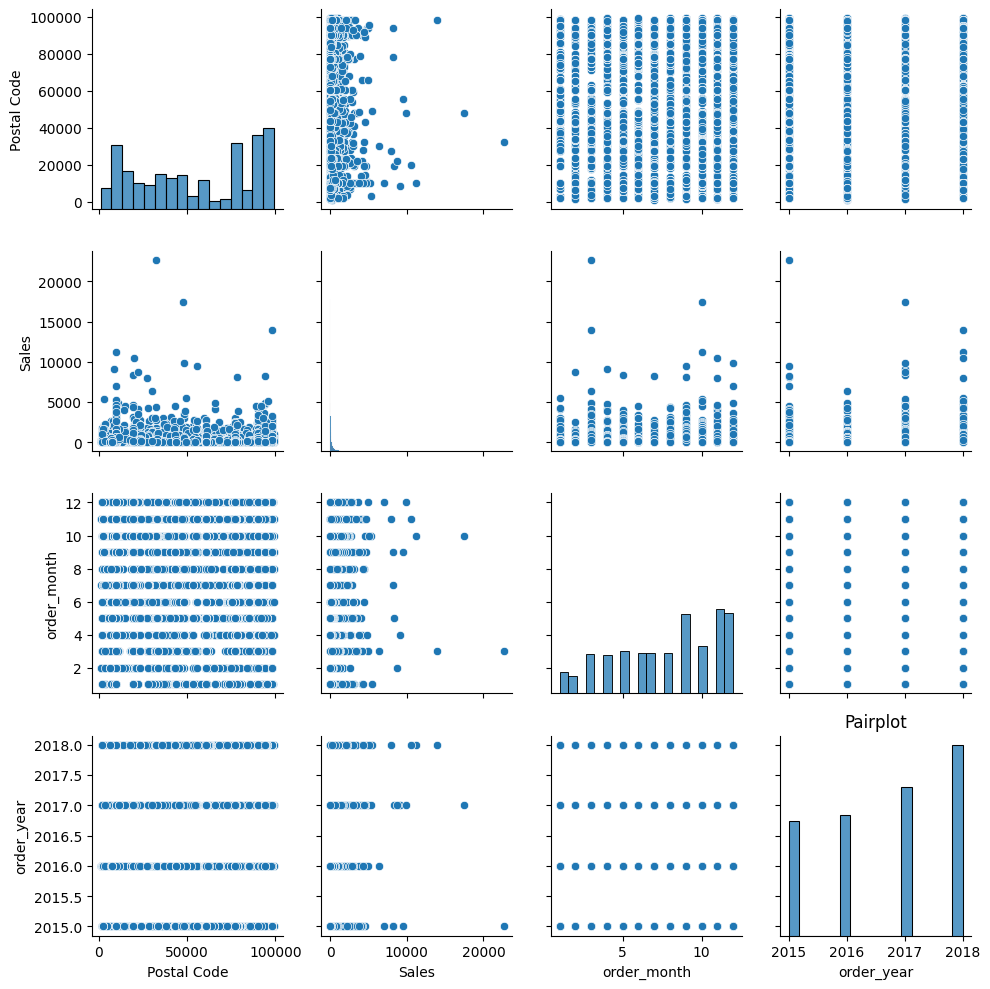

In [50]:
sns.pairplot(data=data)
plt.title('Pairplot')
plt.tight_layout()

Text(0.5, 1.0, 'Line Plot of sales and order dath wrt Region')

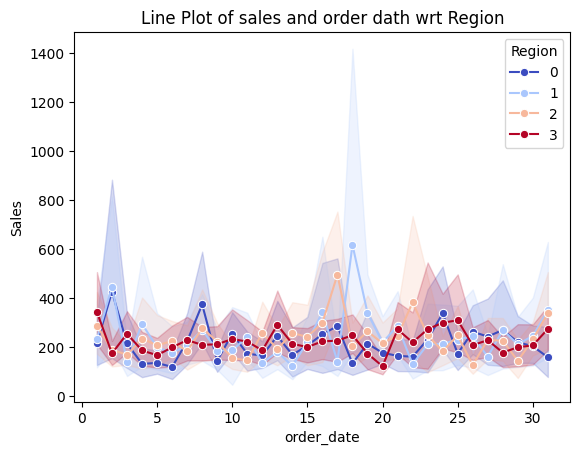

In [51]:
sns.lineplot(x=sales['order_date'],y=sales['Sales'],hue=sales['Region'], marker='o', palette='coolwarm')
plt.title('Line Plot of sales and order dath wrt Region')